In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 

In [39]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [41]:
train.shape

(2000, 21)

In [42]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [43]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

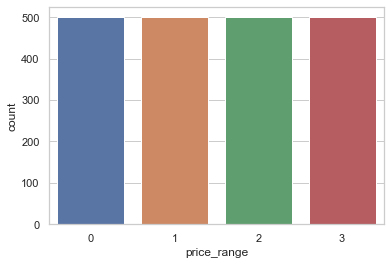

In [70]:
sns.countplot(x="price_range", data=train)

In [71]:
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [45]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
print('number of unique values for attery power is : {}'.format(len(train.battery_power.unique())))

number of unique values for attery power is : 1094


In [47]:
train['battery code'] = round(train['battery_power']/100)

<AxesSubplot:xlabel='battery code', ylabel='price_range'>

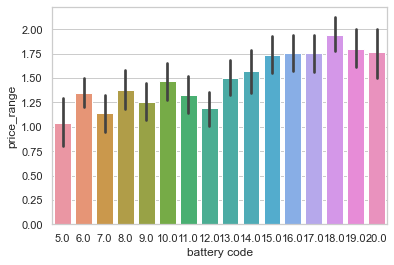

In [48]:
sns.barplot(x="battery code", y="price_range", data=train)

In [49]:
train.drop(['battery code'], axis=1, inplace=True)

<AxesSubplot:xlabel='dual_sim', ylabel='price_range'>

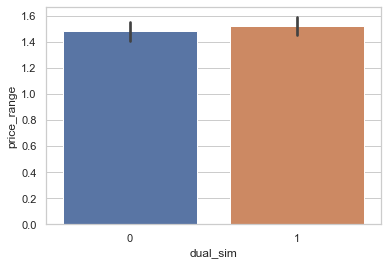

In [50]:
sns.barplot(x="dual_sim", y="price_range", data=train)

In [51]:
train.drop(['dual_sim'], axis=1, inplace=True)

<AxesSubplot:xlabel='blue', ylabel='price_range'>

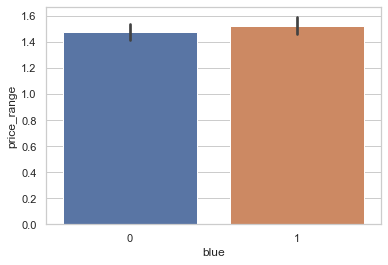

In [52]:
sns.barplot(x="blue", y="price_range", data=train)

In [53]:
train.drop(['blue'], axis=1, inplace=True)

In [54]:
sliced_train = train.loc[:,['price_range','battery_power','clock_speed'] ]

<AxesSubplot:>

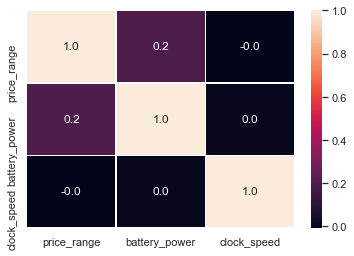

In [55]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [56]:
sliced_train = train.loc[:,['price_range','fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores']]   

<AxesSubplot:>

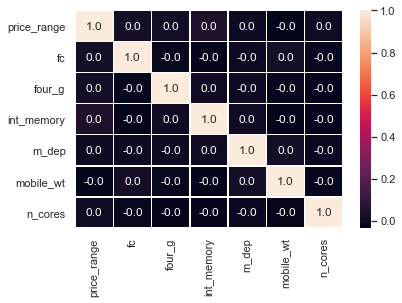

In [57]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [58]:
sliced_train = train.loc[:,['price_range', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']]   

<AxesSubplot:>

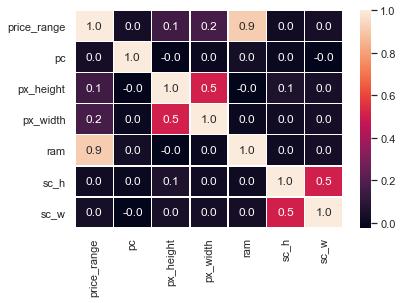

In [59]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [60]:
sliced_train = train.loc[:,['price_range', 'talk_time', 'three_g', 'touch_screen', 'wifi']] 

<AxesSubplot:>

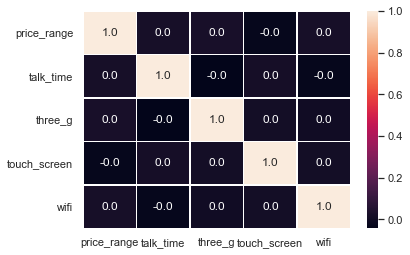

In [61]:
sns.heatmap(sliced_train.corr(), annot=True, linewidths=.5, fmt= '.1f')

In [62]:
X_data = train.drop(['price_range'], axis=1, inplace=False)
y_data = train['price_range']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=44, shuffle =True)

In [64]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1340, 18)
X_test shape is  (660, 18)
y_train shape is  (1340,)
y_test shape is  (660,)


In [68]:
SVCModel =  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3,
                gamma='auto',kernel='linear', max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)
SVCModel.fit(X_train, y_train)


SVCModel Train Score is :  0.996268656716418
SVCModel Test Score is :  0.9636363636363636
----------------------------------------------------


In [69]:
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')


y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

SVCModel Train Score is :  0.996268656716418
SVCModel Test Score is :  0.9636363636363636
----------------------------------------------------
Predicted Value for SVCModel is :  [3 2 3 2 0 0 1 0 0 0]
